## Western Governors University
## Data Mining I Part II
### Shane Boyce


## INTRODUCTION
In this task, you will act as an analyst and create a data mining report. In doing so, you must select one of the data dictionary and data set files to use for your report from the following link: Data Sets and Associated Data Dictionaries.



In [1]:
#math, dataframes and visualizations
import pandas as pd # to load and manipulate data and for One-Hot Encoding
import numpy as np # to calculate the mean and standard deviation

#visualizations
import matplotlib.pyplot as plt # to draw graphs
import seaborn as sns # to draw prettier graphs

#machine learning
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import GridSearchCV # to perform grid search
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn.metrics import mean_squared_error # to calculate the mean squared error


#personal scripts developed during the course lifecycle
import churn_helper as ch

#magic words and settings
import warnings # settings to make the notebook read better

warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)
np.random.seed(42069)

In [2]:
#load the data
df = pd.read_csv('churn_clean.csv')

ch.churnauotclean(df)

df.head()

,State,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timeliness,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,AK,38,Urban,0,68,28561.99,Widowed,Male,0,7.978323,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,MI,10446,Urban,1,27,21704.77,Married,Female,1,11.699080,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,OR,3735,Urban,4,50,9609.57,Widowed,Female,0,10.752800,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,CA,13863,Suburban,1,48,18925.23,Married,Male,0,14.913540,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,TX,11352,Suburban,0,83,40074.19,Separated,Male,1,8.147417,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
df.columns

Index(['State', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'Timeliness', 'Fixes',
       'Replacements', 'Reliability', 'Options', 'Respectfulness', 'Courteous',
       'Listening'],
      dtype='object')

## Part I: Research Question


### A.  Describe the purpose of this data mining report by doing the following:


1.  Propose one question relevant to a real-world organizational situation that you will answer using one of the following prediction methods:

•  decision trees

•  random forests

•  advanced regression (i.e., lasso or ridge regression)


Using a decision tree can churn be predicted with a 70% accuracy?

2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.

The goal of this analysis is to find out if churn can be predicted using the product categories with reasonable accuracy. The data is a good representation of the scenario as it contains the product categories and the churn status of the customers. This analysis can help strengthen analysis conclusions made in logistic regression and the k-nearst neighbor analysis done previously.

## Part II: Method Justification


### B.  Explain the reasons for your chosen prediction method from part A1 by doing the following:


1.  Explain how the prediction method you chose analyzes the selected data set. Include expected outcomes.

Decision Tree classifiers are visually simple flowcharts to classify data based on features and relationships between them (Starmer, 2020). This relationship is heirarchical and in this use case recommended by big data industry giants such as Netflix (Netflix, 2017). The expected outcome is a decision tree that can be used to predict churn based on the product categories while also ranking the importance of each product category via the gini index.

2. Summarize one assumption of the chosen prediction method.

Decision trees can overfit easily if complexity rises(IBM, 2022). SKlearn also assumes that the Gini index is the best way to measure the importance of a feature. This is not always the case and other methods such as mutual information gain or entropy should be considered. Features are preferred to be categorical and not continuous. This is not always the case and continuous features can be binned into categories (Saini, 2019). Decision trees also assume dichotomous independent variables/recursive partitioning of features.


3.  List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.

Numpy and Pandas for dataframe manipulation and analysis
SKlearn for the decision tree
Matplotlib and Seaborn for visualization
Timeit for timing the code
Churn_helper for custom functions used to pre clean dataframe with documented known importing issues in earlier analysis
Scipy for more statistical test options




## Part III: Data Preparation


### C.  Perform data preparation for the chosen data set by doing the following:


1.  Describe one data preprocessing goal relevant to the prediction method from part A1.

The data set will need to be subsetted to the specific product features and the churn column. Following subsetting and due to sklearn limitations the categories will need to be one hot encoded. The data will also need to be split into training and testing sets.

2.  Identify the initial data set variables that you will use to perform the analysis for the prediction question from part A1, and group each variable as continuous or categorical.


In [4]:
#subset the data to the product features and the churn column

product_cats = ['Port_modem', 'Tablet',
                'InternetService', 'Phone', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                'StreamingMovies', 'Churn']

target = product_cats[-1]

3.  Explain the steps used to prepare the data for the analysis. Identify the code segment for each step.


In [5]:
# subset dataframe to the product categories and the churn column

df_prod = df[product_cats[0:-1]]

df_prod.head()

,Port_modem,Tablet,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,1,Fiber Optic,1,1,1,0,0,0,1
1,0,1,Fiber Optic,1,1,0,0,0,1,1
2,1,0,DSL,1,0,0,0,0,0,1
3,0,0,DSL,1,1,0,0,0,1,0
4,1,0,Fiber Optic,0,0,0,0,1,1,0


In [6]:
# one hot encode the product categories that are not binary

df_prod = pd.get_dummies(df_prod, columns=['InternetService'])
df_prod.head()

,Port_modem,Tablet,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetService_DSL,InternetService_Fiber Optic,InternetService_None
0,1,1,1,1,1,0,0,0,1,0,1,0
1,0,1,1,1,0,0,0,1,1,0,1,0
2,1,0,1,0,0,0,0,0,1,1,0,0
3,0,0,1,1,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,1,1,0,0,1,0


In [7]:
#drop internetService_None column to avoid multicollinearity

df_prod.drop('InternetService_None', axis=1, inplace=True)
df_prod.head()

,Port_modem,Tablet,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetService_DSL,InternetService_Fiber Optic
0,1,1,1,1,1,0,0,0,1,0,1
1,0,1,1,1,0,0,0,1,1,0,1
2,1,0,1,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,1,1,0,0,1


In [8]:
# add churn column back to the dataframe

df_prod['Churn'] = df['Churn']
df_prod.head()

,Port_modem,Tablet,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetService_DSL,InternetService_Fiber Optic,Churn
0,1,1,1,1,1,0,0,0,1,0,1,0
1,0,1,1,1,0,0,0,1,1,0,1,1
2,1,0,1,0,0,0,0,0,1,1,0,0
3,0,0,1,1,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,1,1,0,0,1,1


Due to being categorical binary data, no scaling is needed.

4.  Provide a copy of the cleaned data set.


In [9]:
df_prod.to_csv('churn_clean_prod.csv', index=False)

## Part IV: Analysis


### D.  Perform the data analysis and report on the results by doing the following:


1.  Split the data into training and test data sets and provide the file(s).


In [10]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df_prod.drop('Churn', axis=1),
                                                    df_prod['Churn'],
                                                    test_size=0.8,
                                                    random_state=42069)

In [11]:
# save the training and testing sets to csv files
x_train.to_csv('prod_x_train.csv', index=False)
x_test.to_csv('prod_x_test.csv', index=False)
y_train.to_csv('prod_y_train.csv', index=False)
y_test.to_csv('prod_y_test.csv', index=False)

2.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.


The data will be weighed against a variety of statistical measures: Accuracy, misclassification rate, recall, specificity, precision, Harmonic Mean(F1 Score) and Mean Squared Error.

In [12]:
classifier = DecisionTreeClassifier(random_state=42069)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5034,  820],
       [1429,  717]], dtype=int64)

In [14]:
TP, TN, FP, FN = cm[0,0], cm[1,1], cm[1,0], cm[0,1]

accuracy = (TP+TN)/(TP+TN+FP+FN)
misclass = 1 - accuracy
precision = TP/(TP+FP)
recall = TP/(TP+FN)
specificity = TN/(TN+FP)
F1 = (2 * ((precision * recall)/(precision + recall)))
mse = mean_squared_error(y_test, y_pred)

scores = {'Accuracy': accuracy,
          'Misclassification Rate': misclass,
          'Precision': precision,
          'Recall': recall,
          'Specificity': specificity,
          'F1 Score': F1,
          'MSE': mse}

In [15]:
print(f'The accuracy of the default Decision Tree is {round(accuracy, 2)} with a misclassification rate of {round(misclass, 2)}.\n'
      f'The model has a precision positive rate of {round(precision, 2)}, recall/true positive rate of {round(recall, 2)}.\n'
      f'The specificity/true negative rate of the model is {round(specificity, 2)}.\n'
      f'The harmonic mean f1=Score is {round(F1, 2)} and an MSE of {round(mse, 2)}')

The accuracy of the default Decision Tree is 0.72 with a misclassification rate of 0.28.
The model has a precision positive rate of 0.78, recall/true positive rate of 0.86.
The specificity/true negative rate of the model is 0.33.
The harmonic mean f1=Score is 0.82 and an MSE of 0.28


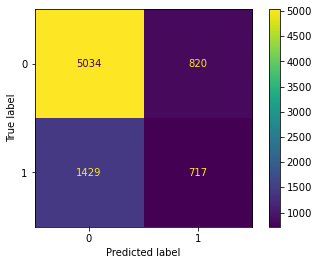

In [16]:
plot_confusion_matrix(classifier, x_test, y_test)

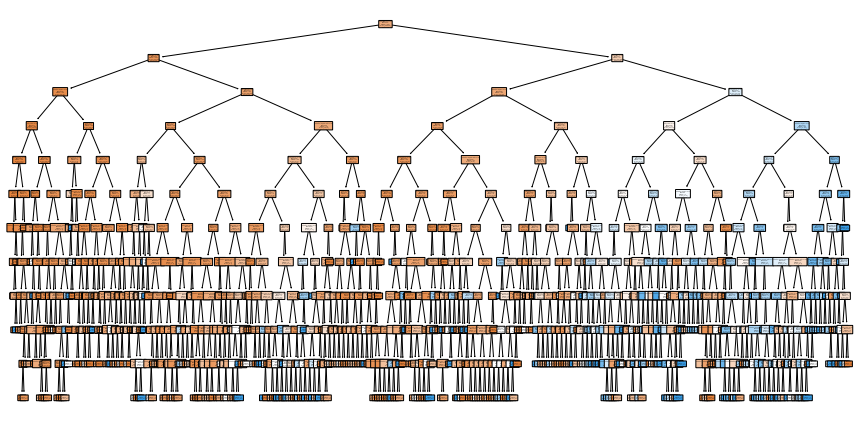

In [17]:
plt.figure(figsize=(15, 7.5))
plot_tree(classifier,
          filled=True,
          rounded=True,
          class_names=["Churn", "No Churn"],
          feature_names=x_train.columns);

# export the decision tree to a png file
plt.savefig('default_tree.png', dpi=300)

In [18]:
# hyperparameter tuning

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}


In [19]:
# run the model with the best parameters
tuned_clf = DecisionTreeClassifier(criterion=best_parameters['criterion'],
                                   max_depth=best_parameters['max_depth'],
                                   min_samples_split=best_parameters['min_samples_split'],
                                   min_samples_leaf=best_parameters['min_samples_leaf'],
                                   random_state=42069)

tuned_clf.fit(x_train, y_train)

y_pred = tuned_clf.predict(x_test)

In [20]:
tuned_cm = confusion_matrix(y_test, y_pred)
tuned_cm

array([[5227,  627],
       [1377,  769]], dtype=int64)

In [21]:
TP, TN, FP, FN = tuned_cm[0,0], tuned_cm[1,1], tuned_cm[1,0], tuned_cm[0,1]
TP, TN, FP, FN

(5227, 769, 1377, 627)

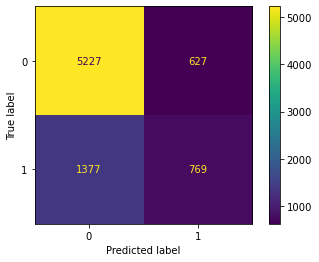

In [22]:
# plot confusion matrix
plot_confusion_matrix(tuned_clf, x_test, y_test)

In [23]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
misclass = 1 - accuracy
precision = TP/(TP+FP)
recall = TP/(TP+FN)
specificity = TN/(TN+FP)
F1 = (2 * ((precision * recall)/(precision + recall)))
mse = mean_squared_error(y_test, y_pred)

tuned_scores = {'Accuracy': accuracy,
                'Misclassification Rate': misclass,
                'Precision': precision,
                'Recall': recall,
                'Specificity': specificity,
                'F1 Score': F1,
                'MSE': mse}

In [24]:
print(f'The accuracy of the Tuned Decision Tree is {round(accuracy, 2)} with a misclassification rate of {round(misclass, 2)}.\n'
      f'The model has a precision positive rate of {round(precision, 2)}, recall/true positive rate of {round(recall, 2)}.\n'
      f'The specificity/true negative rate of the model is {round(specificity, 2)}.\n'
      f'The harmonic mean f1 Score is {round(F1, 2)} and an MSE of {round(mse, 2)}')

The accuracy of the Tuned Decision Tree is 0.75 with a misclassification rate of 0.25.
The model has a precision positive rate of 0.79, recall/true positive rate of 0.89.
The specificity/true negative rate of the model is 0.36.
The harmonic mean f1 Score is 0.84 and an MSE of 0.25


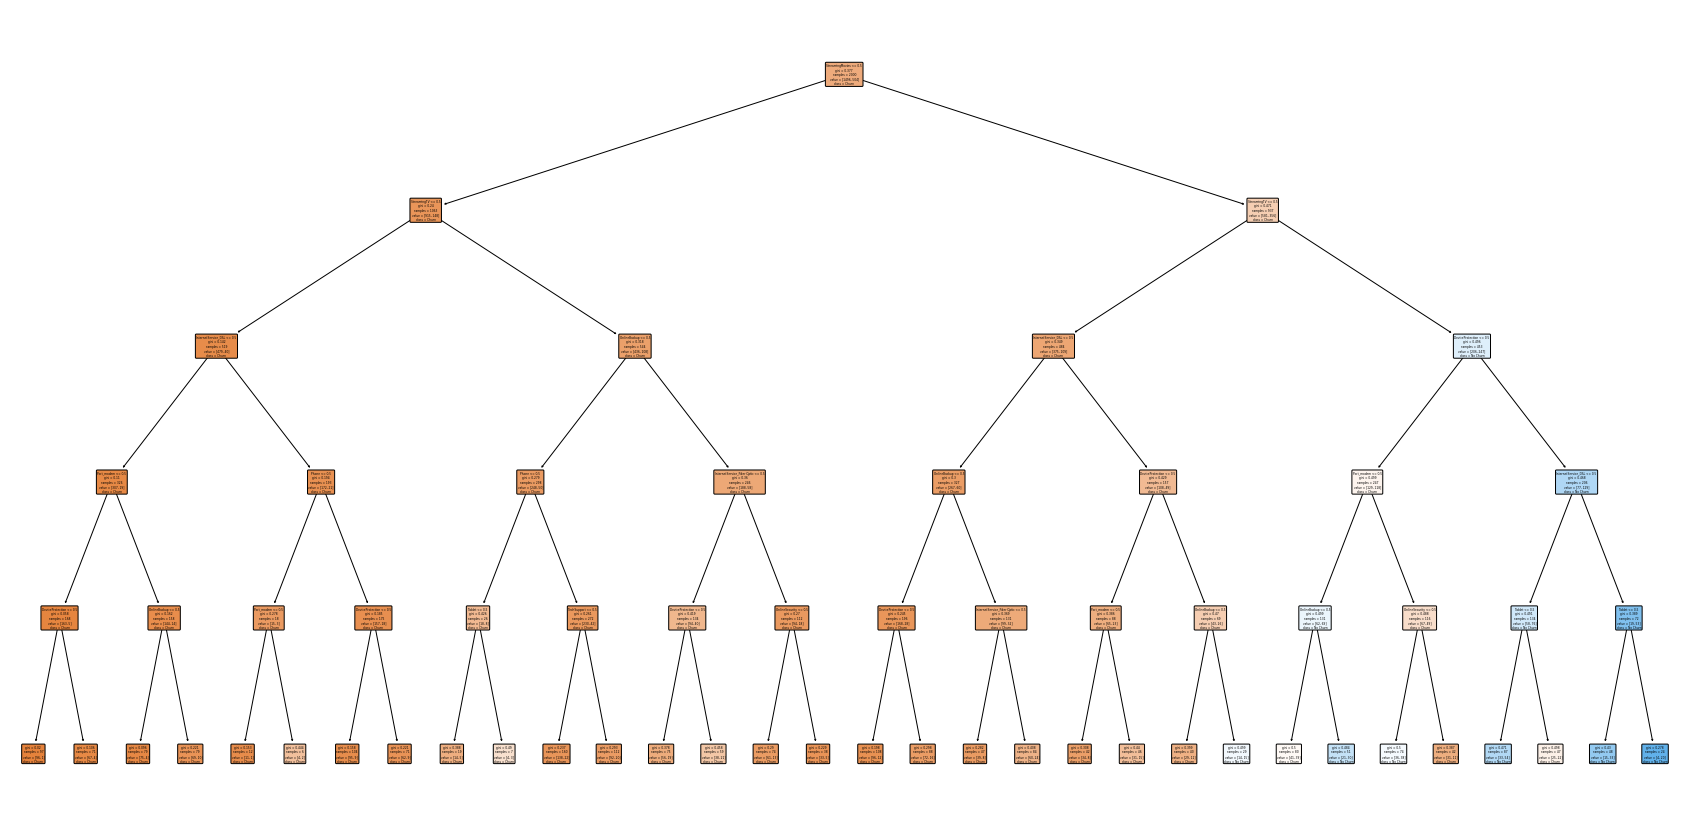

In [25]:
#Display decision tree
plt.figure(figsize=(30, 15))
plot_tree(tuned_clf,
          filled=True,
          rounded=True,
          class_names=["Churn", "No Churn"],
          feature_names=x_train.columns);

# export the decision tree to a png file
plt.savefig('tuned_decisiontree.png', dpi=300)

In [26]:
for key, vals in scores.items():
    if (vals > tuned_scores[key]) & (key != 'MSE') & (key != 'Misclassification Rate'):
        print(f'The default model has a better {key} of {round(vals, 2)} than the tuned model with a {key} of {round(tuned_scores[key], 2)}')
    else:
        print(f'The tuned model has a better {key} of {round(tuned_scores[key], 2)} than the default model with a {key} of {round(vals, 2)}')

The tuned model has a better Accuracy of 0.75 than the default model with a Accuracy of 0.72
The tuned model has a better Misclassification Rate of 0.25 than the default model with a Misclassification Rate of 0.28
The tuned model has a better Precision of 0.79 than the default model with a Precision of 0.78
The tuned model has a better Recall of 0.89 than the default model with a Recall of 0.86
The tuned model has a better Specificity of 0.36 than the default model with a Specificity of 0.33
The tuned model has a better F1 Score of 0.84 than the default model with a F1 Score of 0.82
The tuned model has a better MSE of 0.25 than the default model with a MSE of 0.28


3.  Provide the code used to perform the prediction analysis from part D2.

In line above

## Part V: Data Summary and Implications


### E.  Summarize your data analysis by doing the following:


1. Explain the accuracy and the mean squared error (MSE) of your prediction model.

With the tuned model showing an accuracy of 0.75, the tree is correctly predicting all interactions with products 75% of the time and exceeding the initial 70% goal. The MSE of 0.25 is close to 0 showing a great model fit. Though the untuned model met the goals of the analysis, the tree graph shows it was very difficult to navigate and understand. The tuned model is much easier to understand and has a better score in every scoring category that was tested.

2.  Discuss the results and implications of your prediction analysis.

Highlighting the tuned model precision score of 79% of detecting true churners, the model is better than what accuracy suggests by 4% total and 6% over the un-tuned model. With the overall business goal of reducing churn, the tuned model performs better on identifying churners than non churners ensuring alignment with overall business strategy!

The top features could also indicate service problems. With Movies being a root node and the next node is Streaming TV, it is clear that there are potential service issues with those two products. This services issue is strengthened considering logistic Regression found these services to be the top two features contributing to churn.

3.  Discuss one limitation of your data analysis.

A major limitation is the assumption that products are a driving factor in predicting churn. While the model is accurate, the features selected may not be the best predictors of churn. Earlier logistics regression for feature selection was also limited due to the low quality of the customer filled fields. Churn is also still not defined as terminating all services, reducing services or migrating services (i.e. moving from a landline to a cell phone). Without a clear definition of churn, the model may not be as accurate as it could be.

4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.

This model first ranks the products in ginni impurity realtionship to determine if a customer will churn. Any customer can be thrown through the decision tree and if they are churners the model will identify them 79% of the time. Using this alongside the linear regression model provided earlier to increase tenure, an individual can be targeted for deals/packages/bonuses and more to reduce churn risk/increase tenure. This model also has the same implication as logistic regression, the same statistically significant features for predicting churn in that model regarding products are the top nodes in the tuned decision tree. It may be worth observing the quality of service for those products and if there are any issues, address them to reduce churn risk.

I do recommend confirming this model in comparison to XGBOOST decision tree and ADABOOST to see if any irrelevant categories have been used to strengthen organizational insight and reduce churn risk with a better model.



## Sources

Blog, N. T. (2017, April 18). Netflix recommendations: Beyond the 5 stars (part 2). Medium. Retrieved September 11, 2022, from https://netflixtechblog.com/netflix-recommendations-beyond-the-5-stars-part-2-d9b96aa399f5


IBM (Ed.). (n.d.). What is a decision tree. topics/decision-trees. Retrieved September 11, 2022, from https://www.ibm.com/topics/decision-trees


Saini, A. (2021, August 31). Decision tree algorithm - A complete guide. Analytics Vidhya. Retrieved September 11, 2022, from https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/


Starmer, J. (2020, June 6). Classification trees in python from start to finish - youtube. Retrieved September 11, 2022, from https://www.youtube.com/watch?v=q90UDEgYqeI